In [1]:
import torch
from pytorch_wavelets import DTCWTForward

# Assuming `latent_noise` is your latent space noise tensor
latent_noise = torch.randn(1, 3, 256, 256)  # Example shape [batch, channels, height, width]

# Initialize the Dual-Tree Complex Wavelet Transform (DTCWT) with level j = 5
wavelet_transform = DTCWTForward(J=5, biort='near_sym_a', qshift='qshift_a')

# Perform the wavelet transform
Yl, Yh = wavelet_transform(latent_noise)

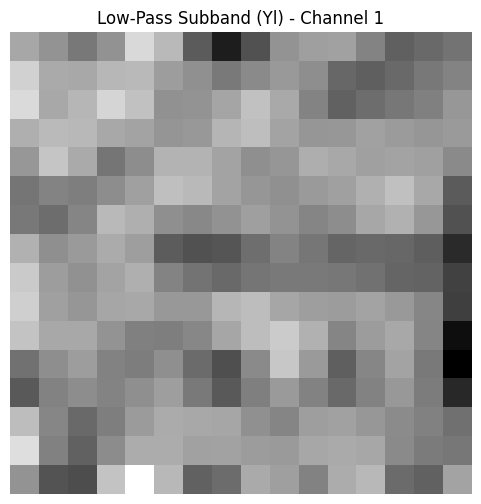

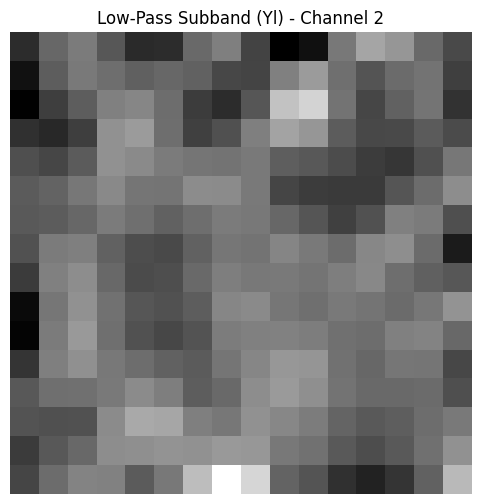

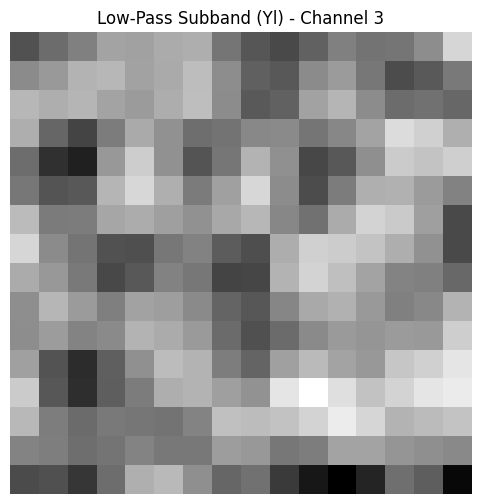

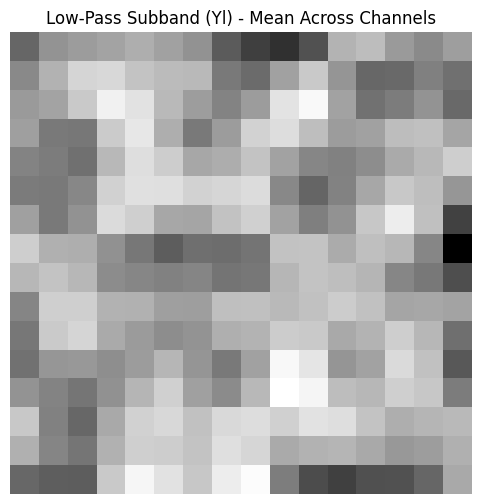

In [4]:
import matplotlib.pyplot as plt
Yl_np = Yl.squeeze().cpu().detach().numpy()
for i in range(Yl_np.shape[0]):
    plt.figure(figsize=(6, 6))
    plt.title(f"Low-Pass Subband (Yl) - Channel {i+1}")
    plt.imshow(Yl_np[i], cmap='gray')
    plt.axis('off')
    plt.show()

# Or you can take the mean across the channels
Yl_mean = Yl_np.mean(axis=0)
plt.figure(figsize=(6, 6))
plt.title("Low-Pass Subband (Yl) - Mean Across Channels")
plt.imshow(Yl_mean, cmap='gray')
plt.axis('off')
plt.show()

In [11]:
image_path = "Fresh_Apple_PNG_Clip_Art_Image.png"

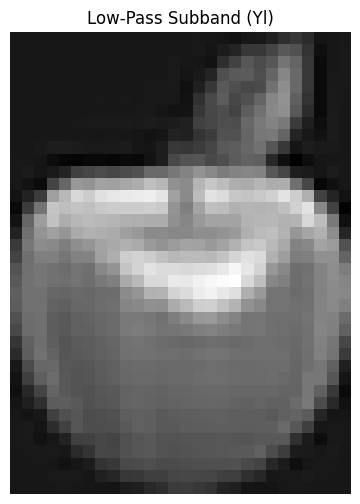

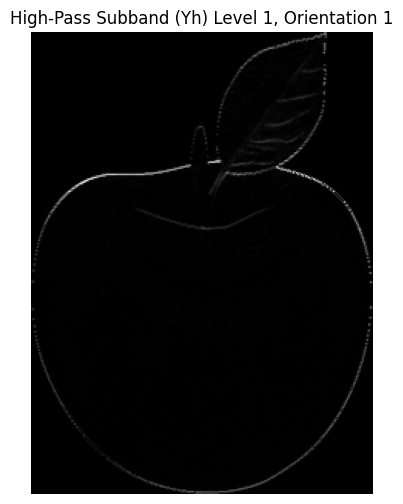

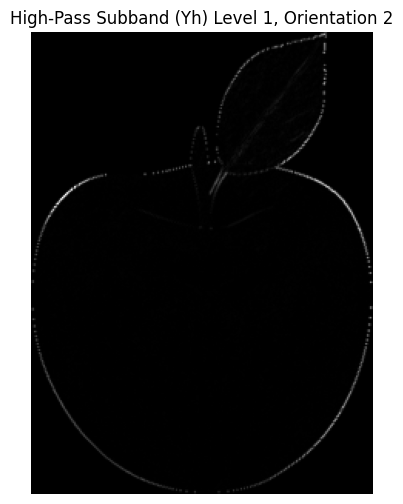

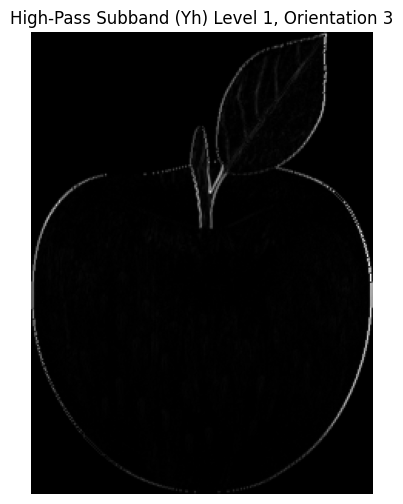

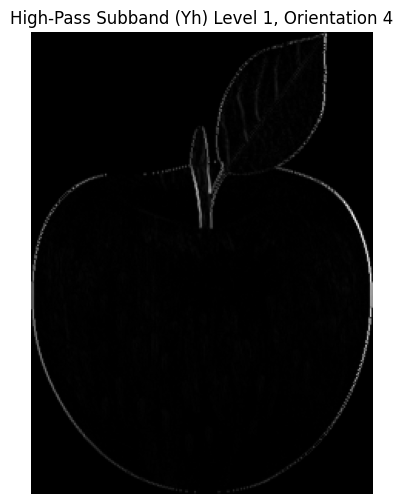

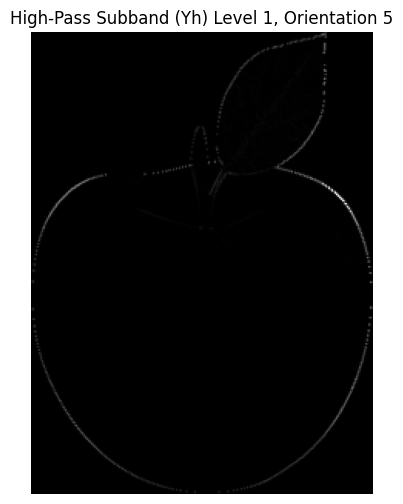

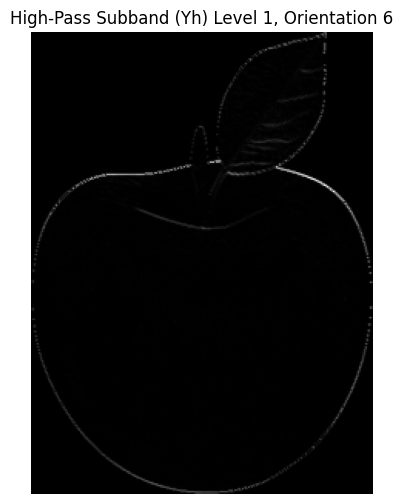

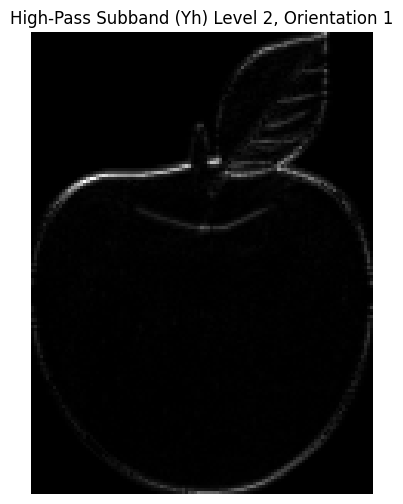

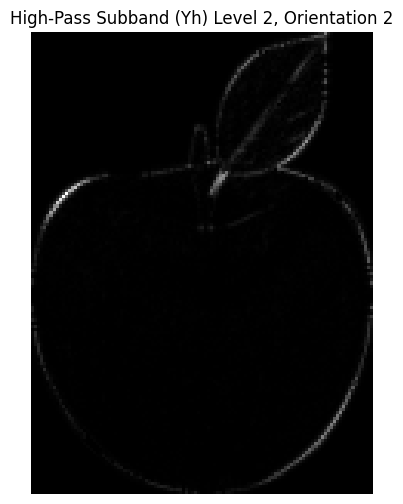

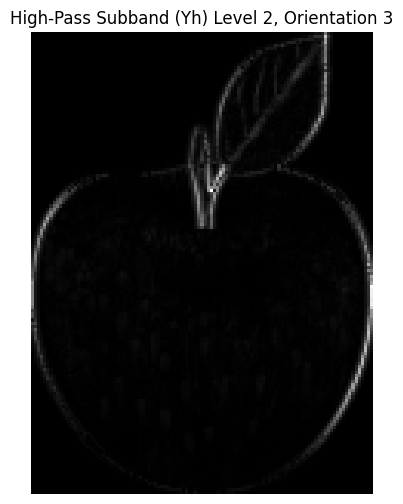

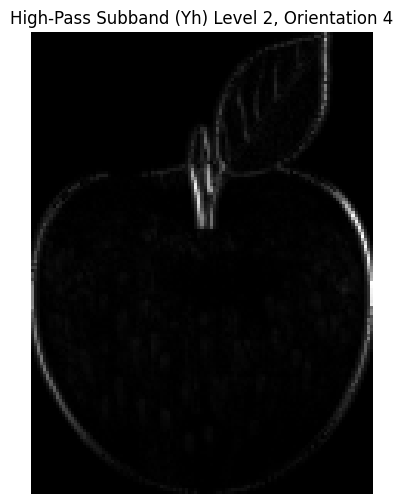

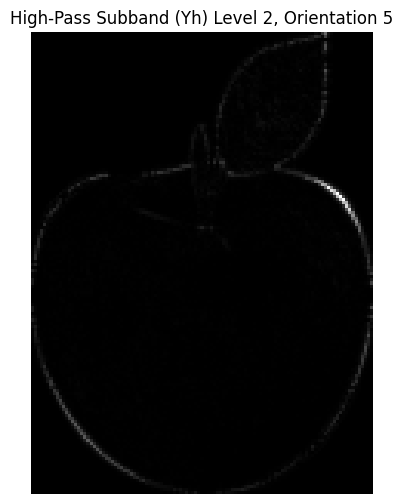

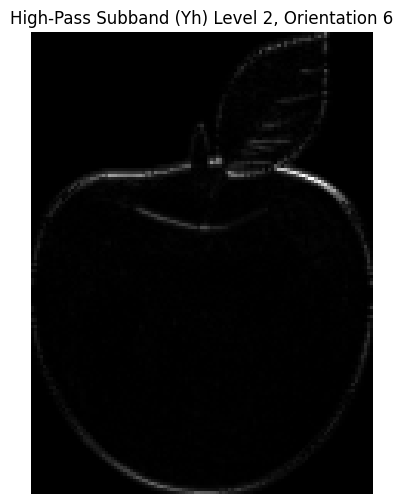

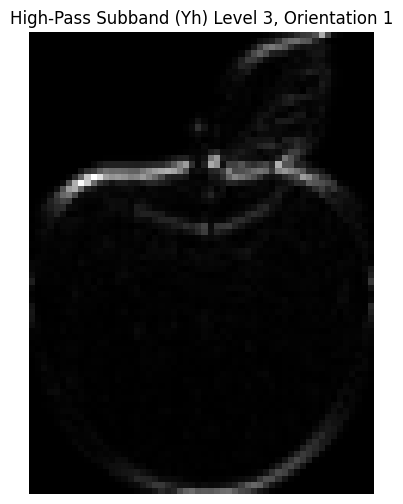

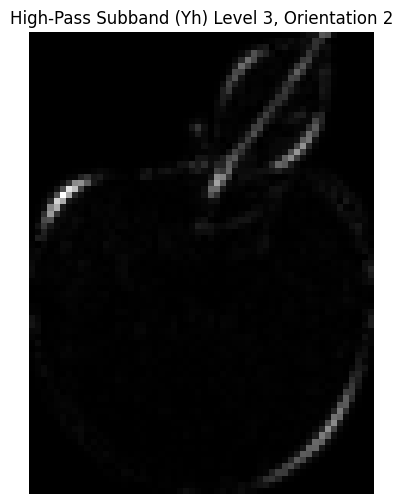

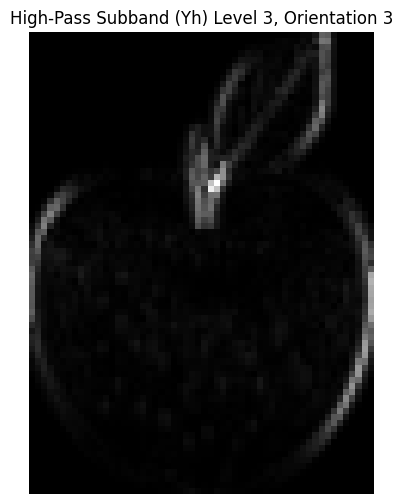

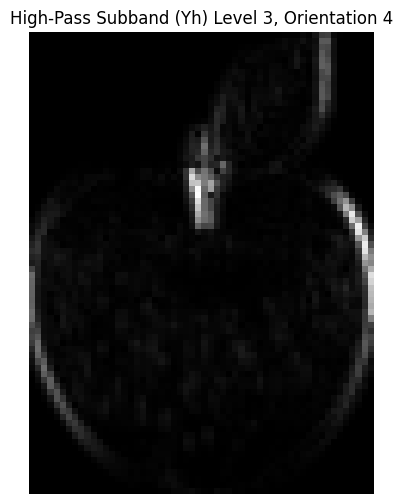

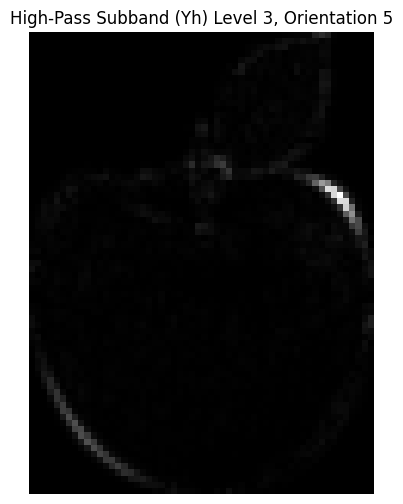

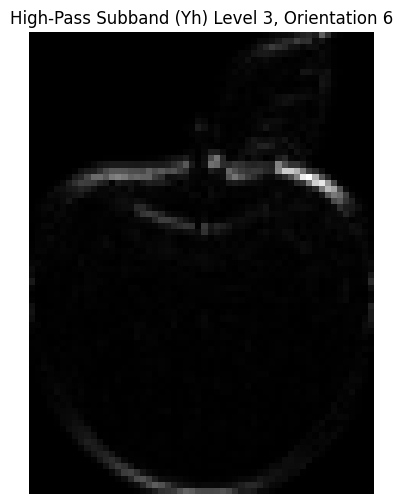

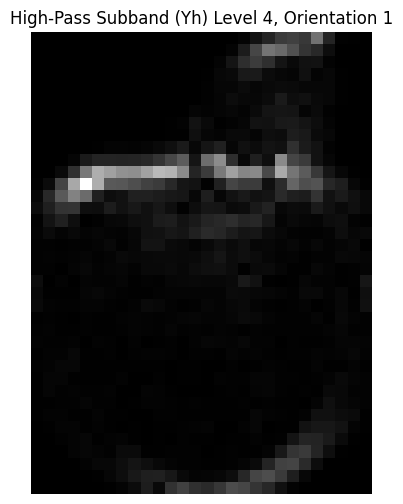

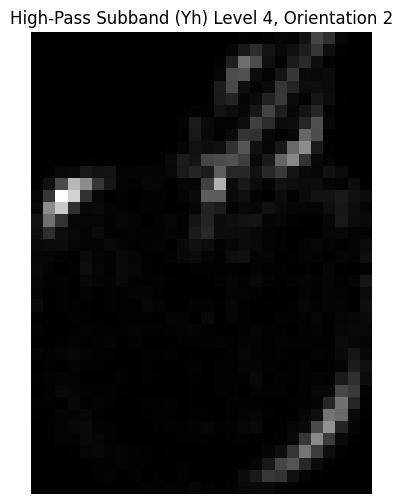

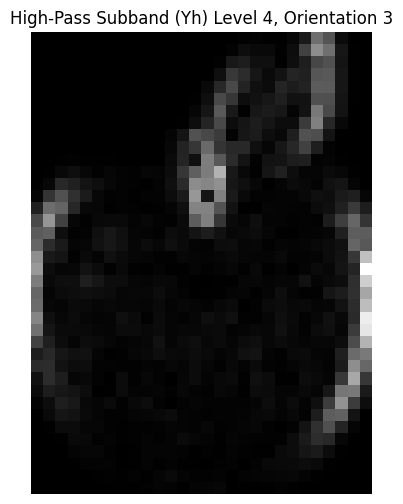

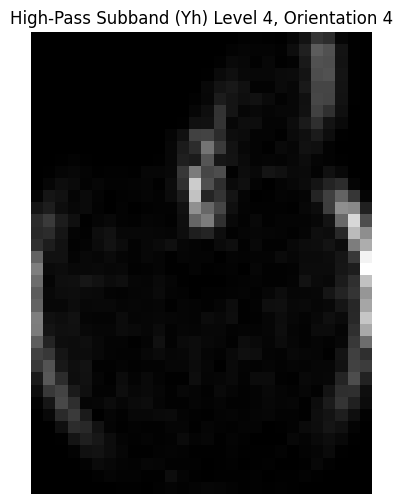

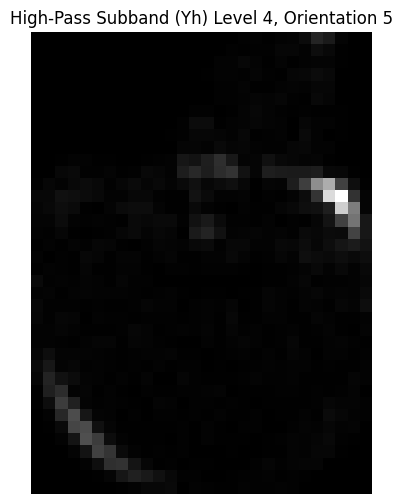

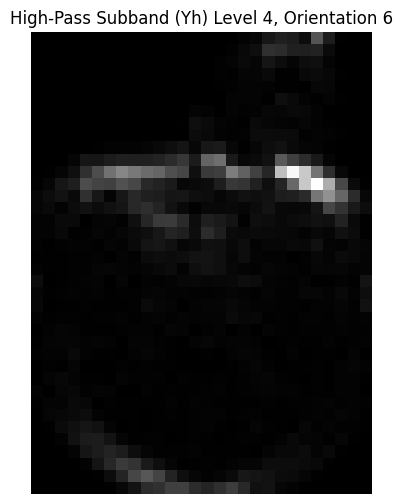

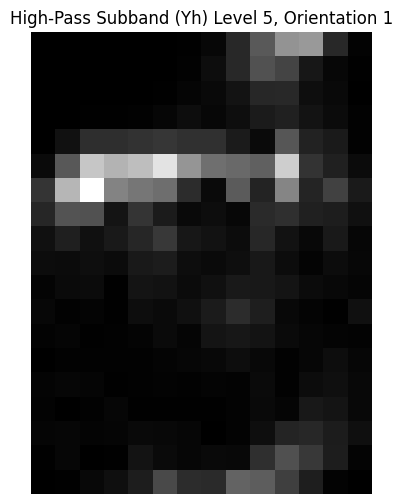

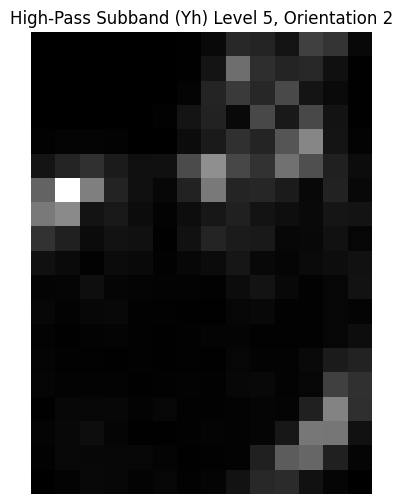

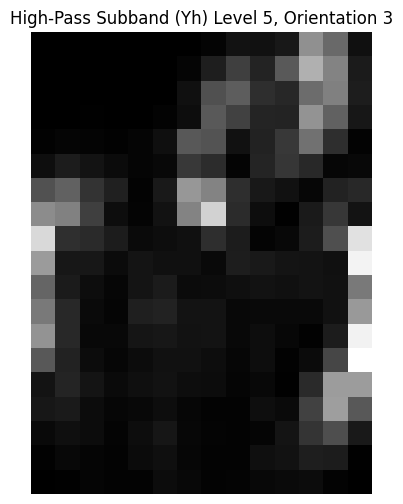

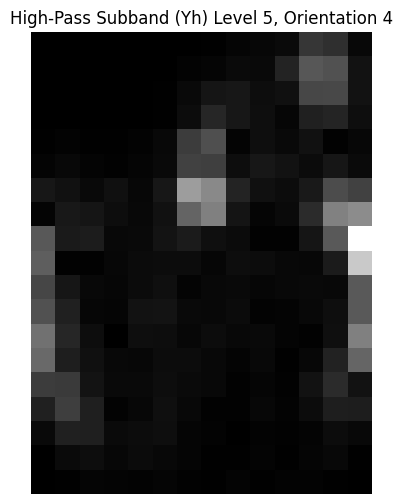

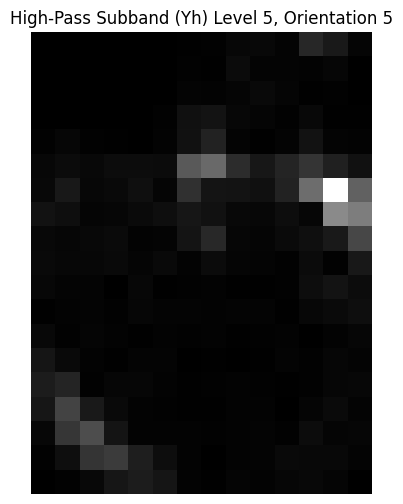

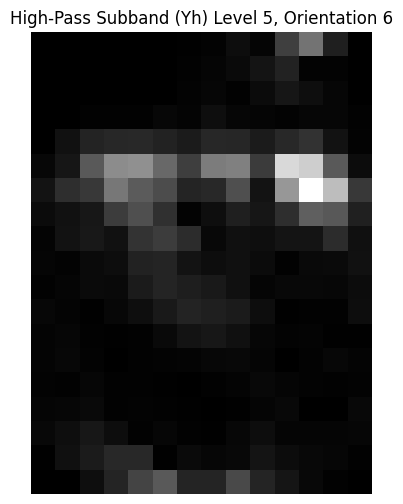

In [12]:
import torch
import matplotlib.pyplot as plt
from PIL import Image
from pytorch_wavelets import DTCWTForward
from torchvision.transforms import ToTensor, Grayscale

# Load your image (replace 'image_path' with your image file path)
image = Image.open(image_path)

# Convert to grayscale if not already
if image.mode != 'L':
    image = Grayscale()(image)

# Convert image to a tensor
image_tensor = ToTensor()(image).unsqueeze(0)  # Shape: [1, 1, H, W]

# Initialize the DTCWT with level j = 5
wavelet_transform = DTCWTForward(J=5, biort='near_sym_a', qshift='qshift_a')

# Perform the wavelet transform
Yl, Yh = wavelet_transform(image_tensor)

# Visualize the low-pass subband (Yl)
Yl_np = Yl.squeeze().cpu().detach().numpy()
plt.figure(figsize=(6, 6))
plt.title("Low-Pass Subband (Yl)")
plt.imshow(Yl_np, cmap='gray')
plt.axis('off')
plt.show()

# Visualize the high-pass subbands (Yh)
for level_idx, Yh_level in enumerate(Yh):
    # Yh_level shape: [1, 1, orientations, height, width, 2]
    Yh_level = Yh_level.squeeze()  # Remove singleton dimensions

    # Check the new shape
    if Yh_level.ndim == 4:
        for orientation_idx in range(Yh_level.shape[0]):
            # Extract the real and imaginary parts
            real_part = Yh_level[orientation_idx, :, :, 0]
            imag_part = Yh_level[orientation_idx, :, :, 1]

            # Compute the magnitude
            magnitude = torch.sqrt(real_part**2 + imag_part**2).cpu().detach().numpy()

            plt.figure(figsize=(18, 6))
            plt.title(f"High-Pass Subband (Yh) Level {level_idx+1}, Orientation {orientation_idx+1}")
            plt.imshow(magnitude, cmap='gray')
            plt.axis('off')
            plt.show()
    else:
        print(f"Unexpected shape for Yh_level: {Yh_level.shape}")


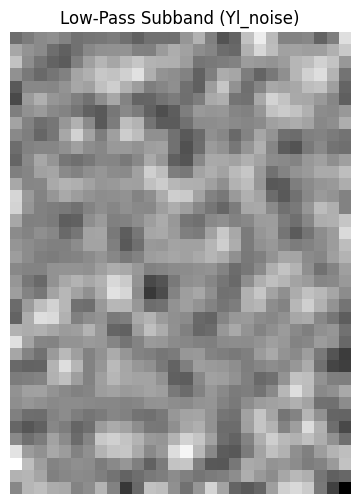

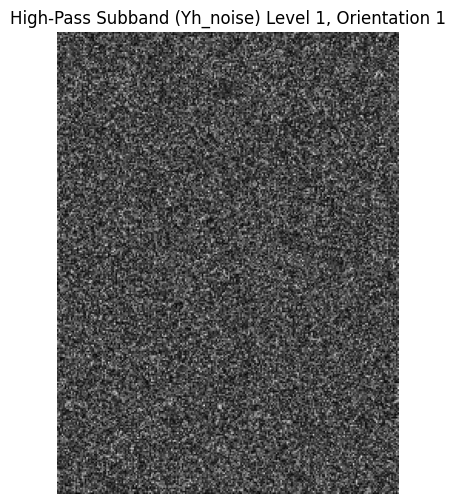

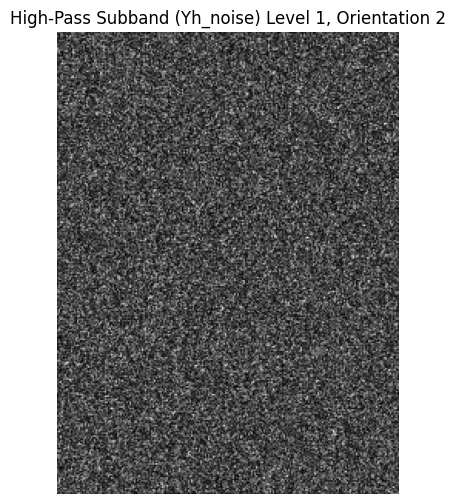

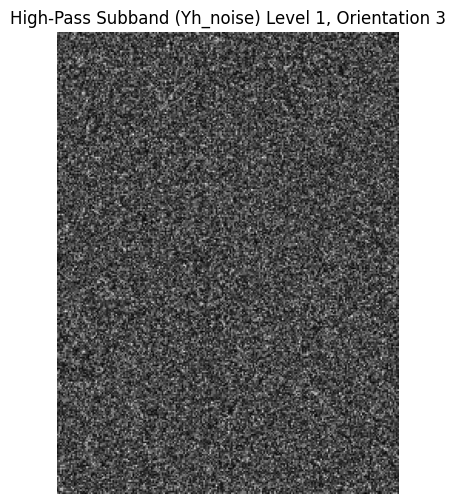

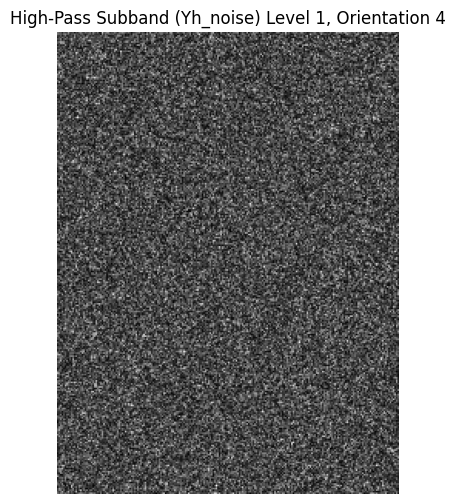

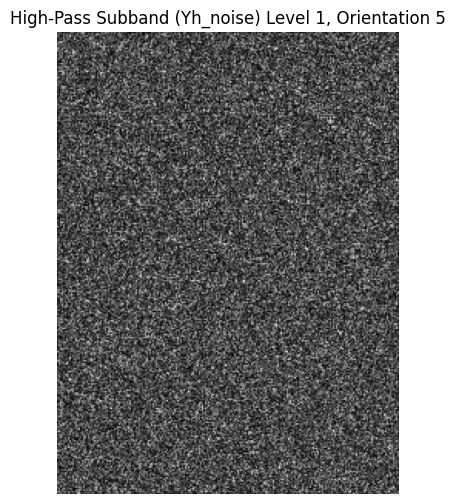

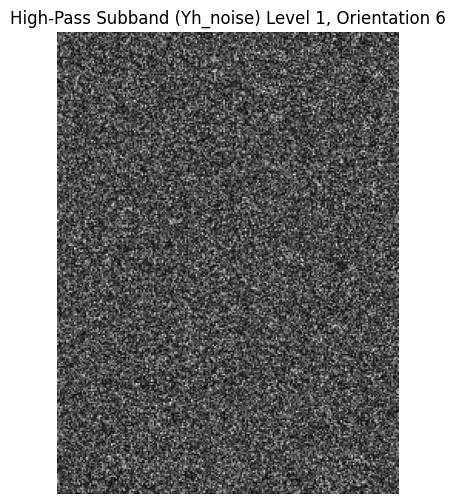

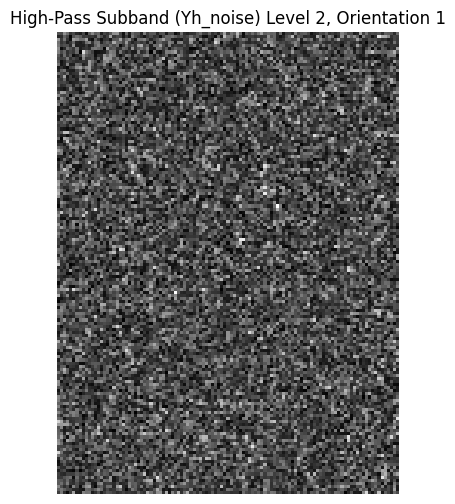

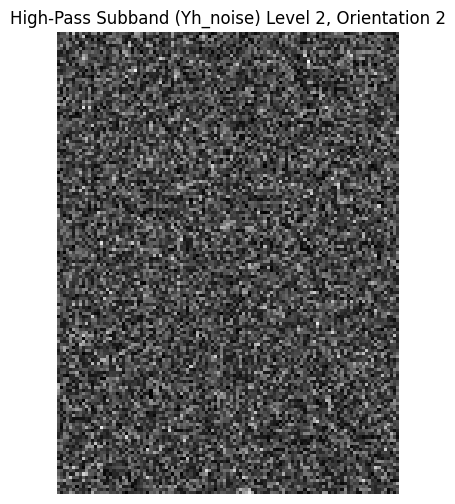

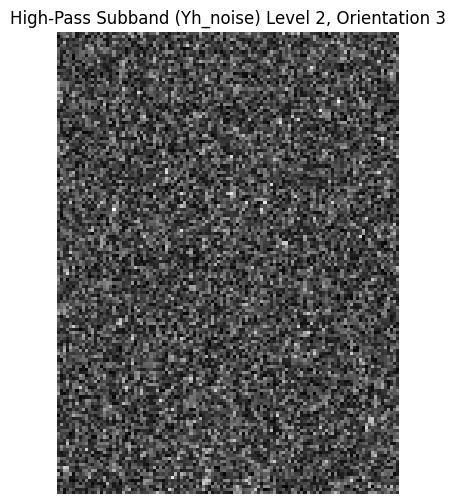

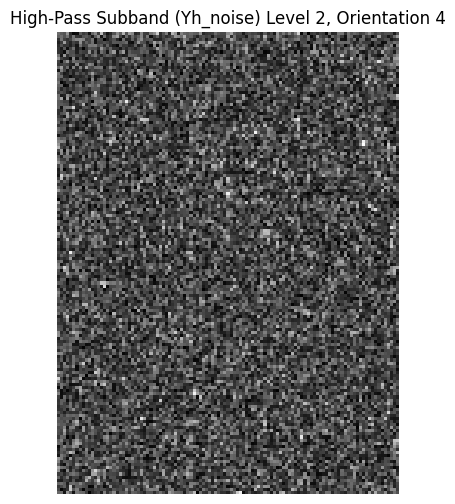

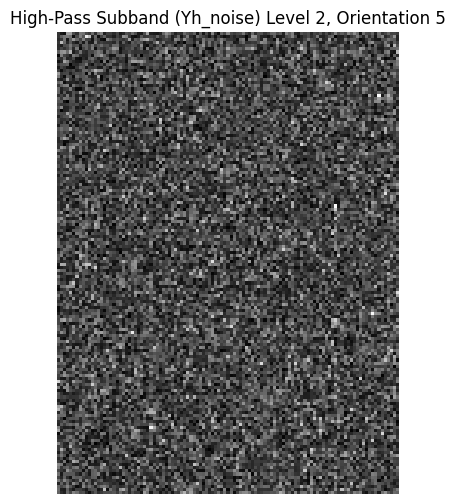

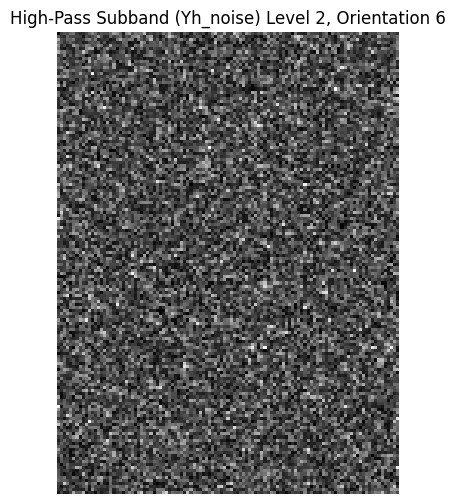

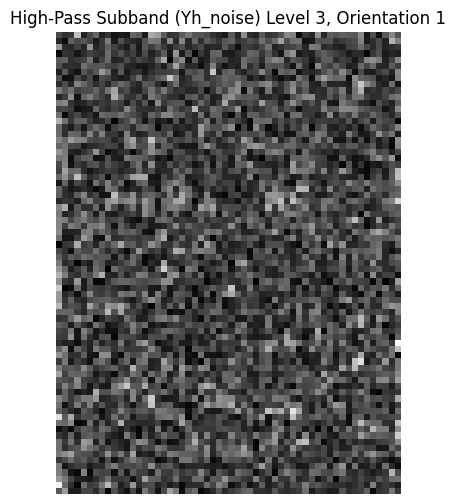

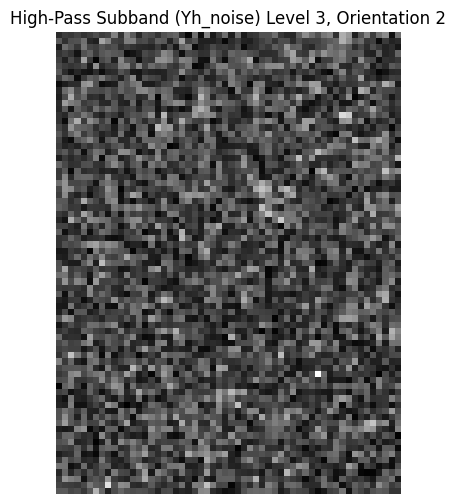

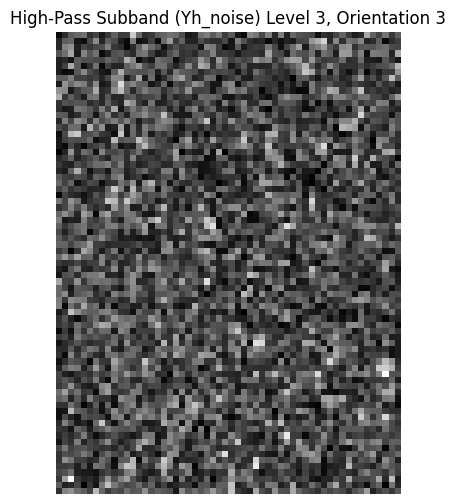

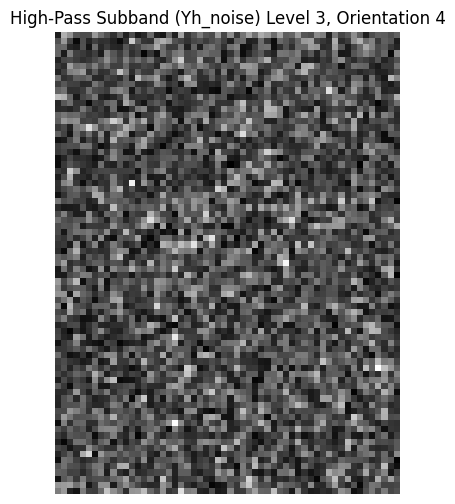

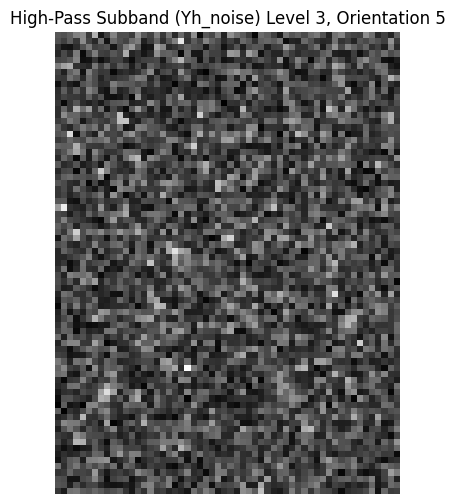

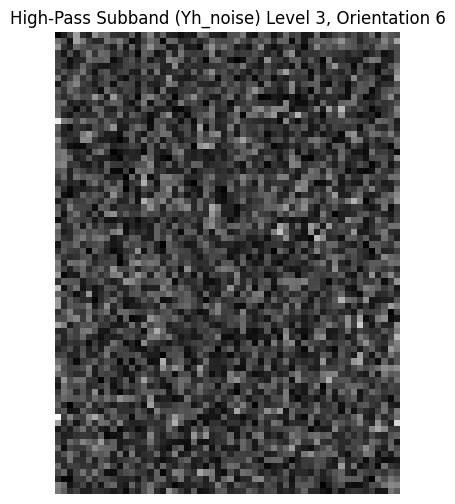

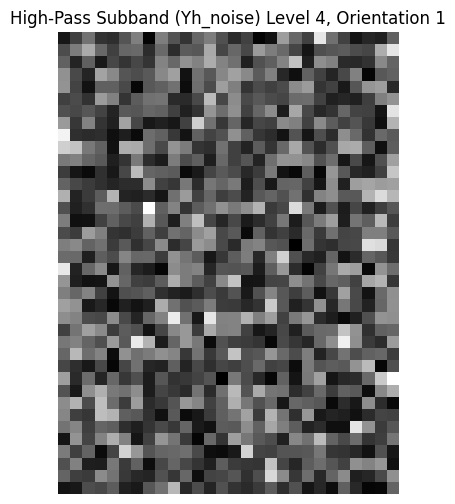

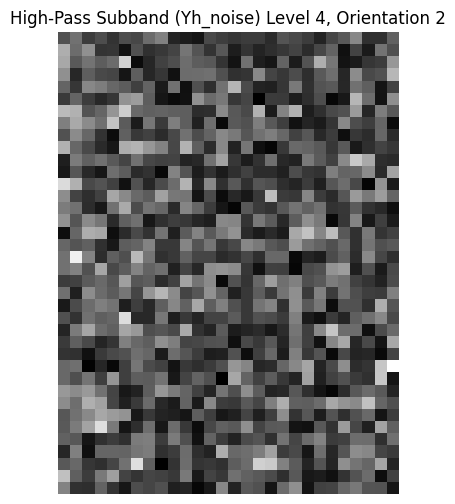

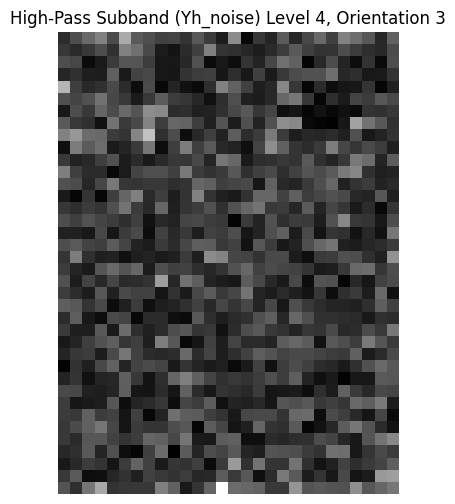

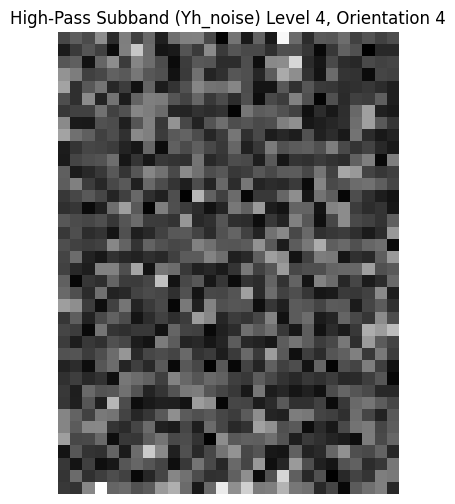

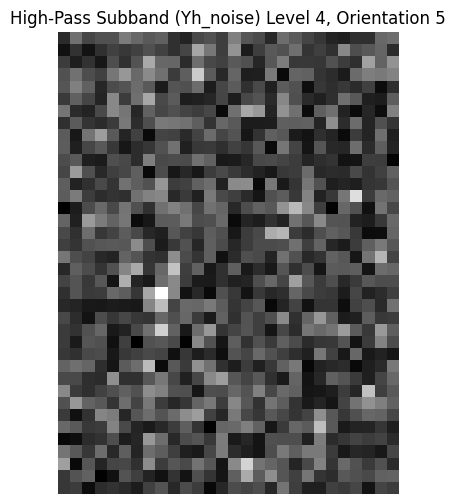

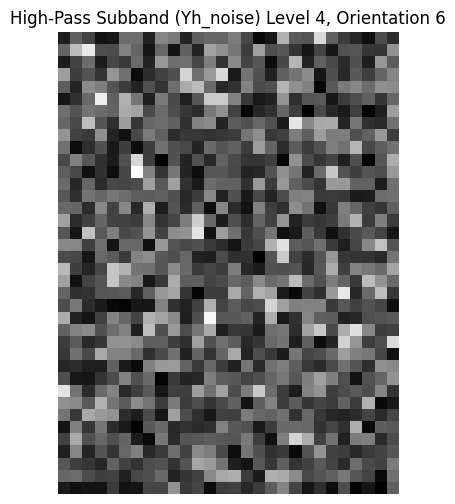

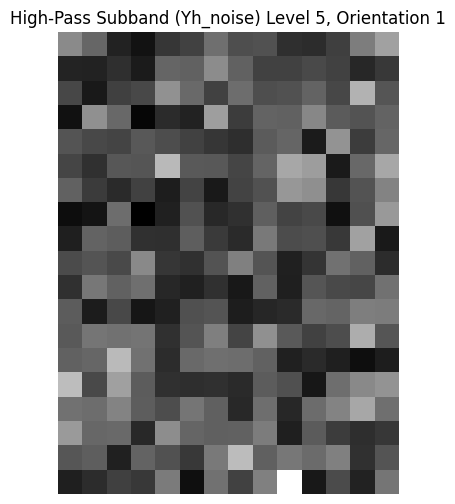

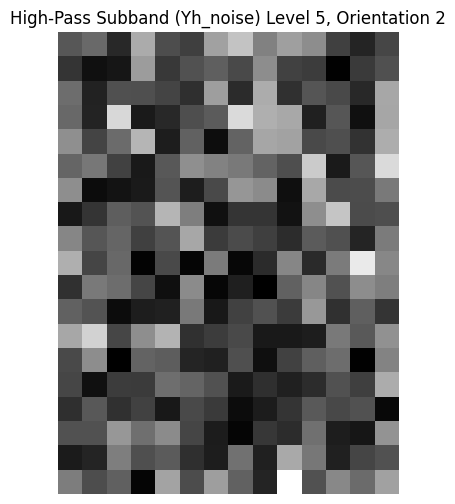

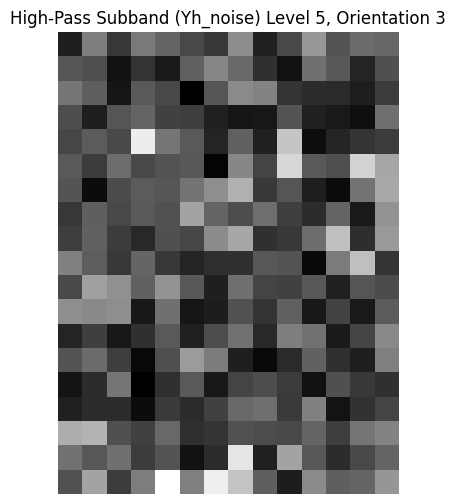

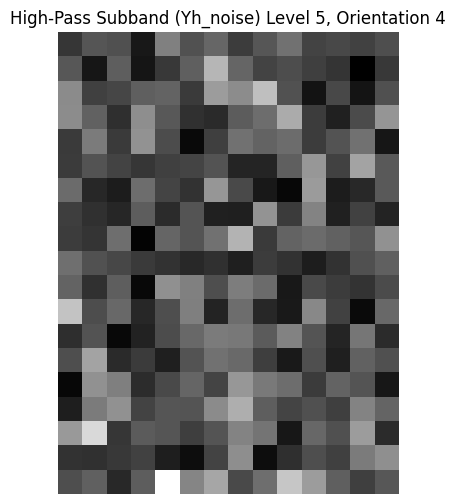

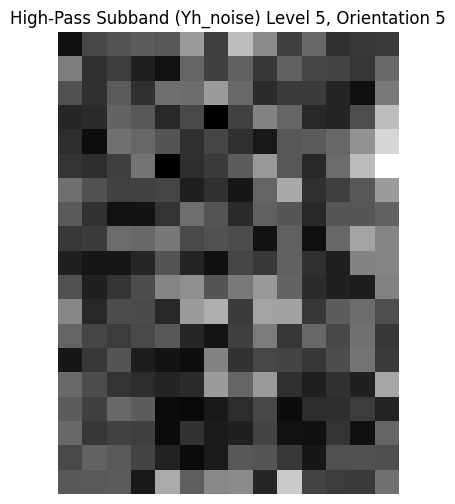

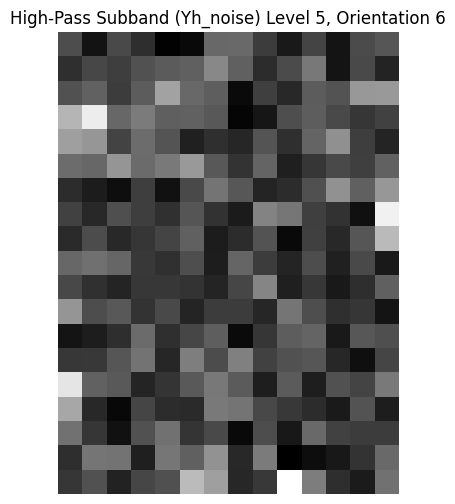

In [13]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from pytorch_wavelets import DTCWTForward

# Load the original image to get the size (replace 'image_path' with your original image file path)
original_image = Image.open(image_path)

# Convert to grayscale if not already and get size
if original_image.mode != 'L':
    original_image = Grayscale()(original_image)

# Get the size of the original image
width, height = original_image.size

# Generate Gaussian noise image with the same size
noise_image = np.random.normal(0, 1, (height, width)).astype(np.float32)
noise_image_pil = Image.fromarray((noise_image * 255).astype(np.uint8))  # Scale for visualization

# Convert noise image to tensor
noise_image_tensor = ToTensor()(noise_image_pil).unsqueeze(0)  # Shape: [1, 1, H, W]

# Initialize the DTCWT with level j = 5
wavelet_transform = DTCWTForward(J=5, biort='near_sym_a', qshift='qshift_a')

# Perform the wavelet transform on the noise image
Yl_noise, Yh_noise = wavelet_transform(noise_image_tensor)

# Visualize the low-pass subband (Yl_noise)
Yl_noise_np = Yl_noise.squeeze().cpu().detach().numpy()
plt.figure(figsize=(6, 6))
plt.title("Low-Pass Subband (Yl_noise)")
plt.imshow(Yl_noise_np, cmap='gray')
plt.axis('off')
plt.show()

# Visualize the high-pass subbands (Yh_noise)
for level_idx, Yh_level in enumerate(Yh_noise):
    # Yh_level shape: [1, 1, orientations, height, width, 2]
    Yh_level = Yh_level.squeeze()  # Remove singleton dimensions

    if Yh_level.ndim == 4:
        for orientation_idx in range(Yh_level.shape[0]):
            # Extract the real and imaginary parts
            real_part = Yh_level[orientation_idx, :, :, 0]
            imag_part = Yh_level[orientation_idx, :, :, 1]

            # Compute the magnitude
            magnitude = torch.sqrt(real_part**2 + imag_part**2).cpu().detach().numpy()

            plt.figure(figsize=(18, 6))
            plt.title(f"High-Pass Subband (Yh_noise) Level {level_idx+1}, Orientation {orientation_idx+1}")
            plt.imshow(magnitude, cmap='gray')
            plt.axis('off')
            plt.show()
    else:
        print(f"Unexpected shape for Yh_level: {Yh_level.shape}")


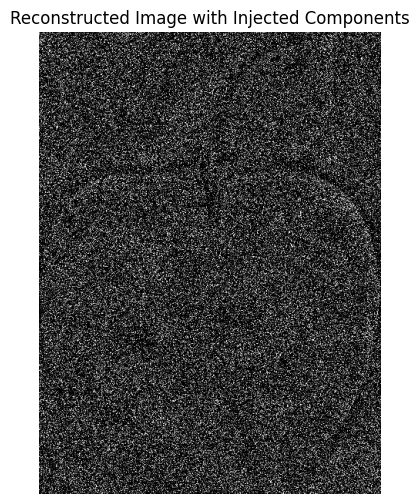

In [28]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from pytorch_wavelets import DTCWTForward, DTCWTInverse
from torchvision.transforms import ToTensor, Grayscale

# Load the grayscale image
grayscale_image = Image.open(image_path)
if grayscale_image.mode != 'L':
    grayscale_image = Grayscale()(grayscale_image)
grayscale_image_tensor = ToTensor()(grayscale_image).unsqueeze(0)  # Shape: [1, 1, H, W]

# Generate Gaussian noise image with the same size
original_width, original_height = grayscale_image.size
noise_image = np.random.normal(0, 1, (original_height, original_width)).astype(np.float32)
noise_image_tensor = torch.from_numpy(noise_image).unsqueeze(0).unsqueeze(0)  # Shape: [1, 1, H, W]

# Initialize the DTCWT with level j = 5
wavelet_transform = DTCWTForward(J=5, biort='near_sym_a', qshift='qshift_a')
inverse_wavelet_transform = DTCWTInverse(biort='near_sym_a', qshift='qshift_a')

# Perform wavelet transform on both images
Yl_grayscale, Yh_grayscale = wavelet_transform(grayscale_image_tensor)
Yl_noise, Yh_noise = wavelet_transform(noise_image_tensor)

# Inject grayscale components into the noise image
alpha = 0.5  # Blending factor for injection
Yh_noise_modified = []

for level_idx, (Yh_g, Yh_n) in enumerate(zip(Yh_grayscale, Yh_noise)):
    # Ensure both Yh_g and Yh_n have the same shape
    assert Yh_g.shape == Yh_n.shape, f"Shape mismatch at level {level_idx}: {Yh_g.shape} vs {Yh_n.shape}"

    # Perform the injection by blending the components
    Yh_modified = (1 - alpha) * Yh_n + alpha * Yh_g

    # Append the modified subband to the list
    Yh_noise_modified.append(Yh_modified)

# Reconstruct the image from the modified components
reconstructed_image_tensor = inverse_wavelet_transform((Yl_noise, Yh_noise_modified))

# Convert the tensor back to an image
reconstructed_image_np = reconstructed_image_tensor.squeeze().cpu().detach().numpy()
reconstructed_image_np = np.clip(reconstructed_image_np, 0, 1)  # Clip values to [0, 1]
reconstructed_image_pil = Image.fromarray((reconstructed_image_np * 255).astype(np.uint8))

# Display the reconstructed image
plt.figure(figsize=(6, 6))
plt.title("Reconstructed Image with Injected Components")
plt.imshow(reconstructed_image_pil, cmap='gray')
plt.axis('off')
plt.show()


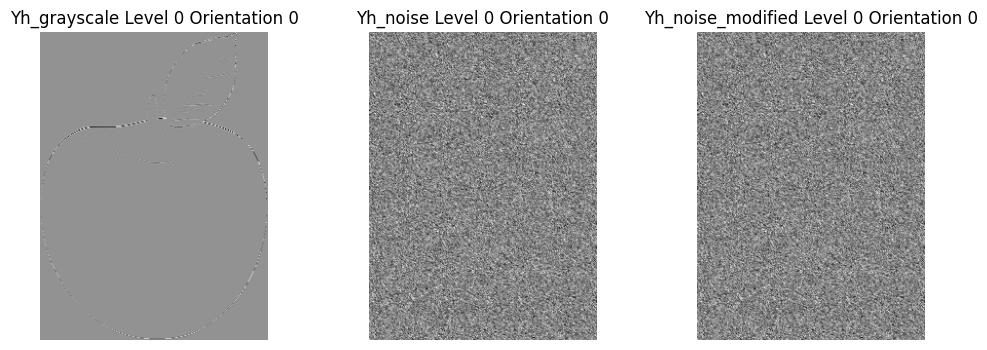

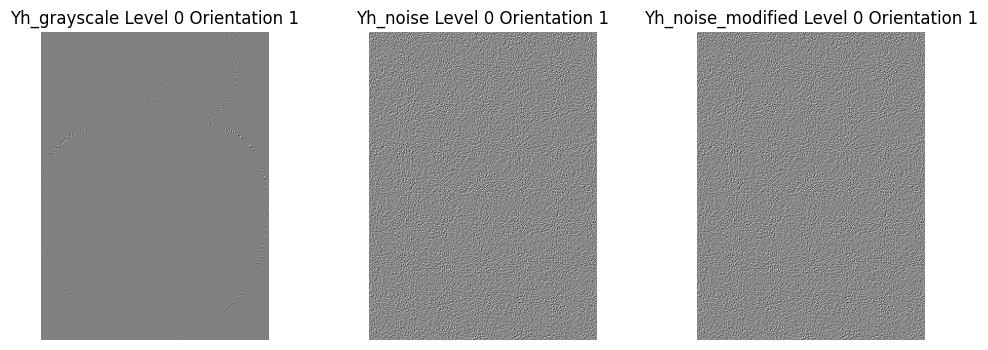

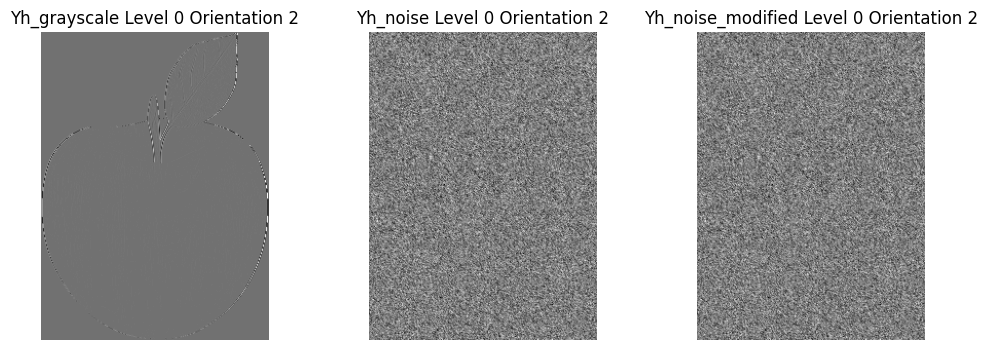

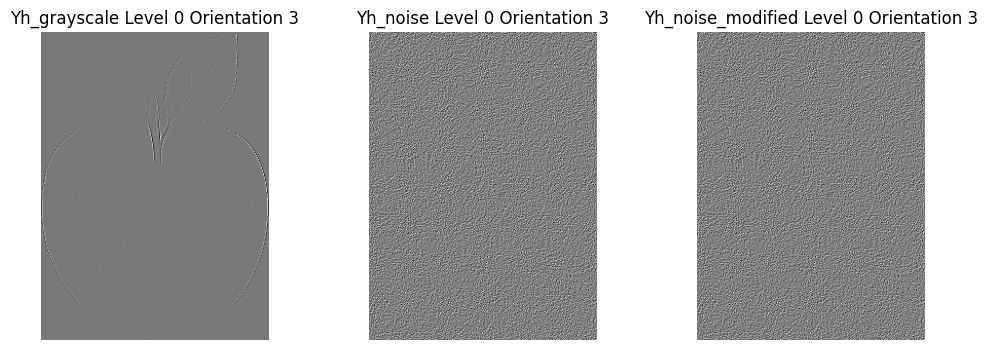

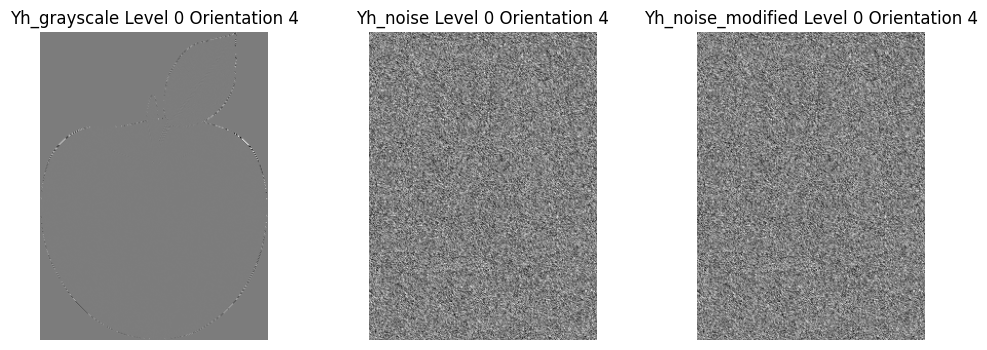

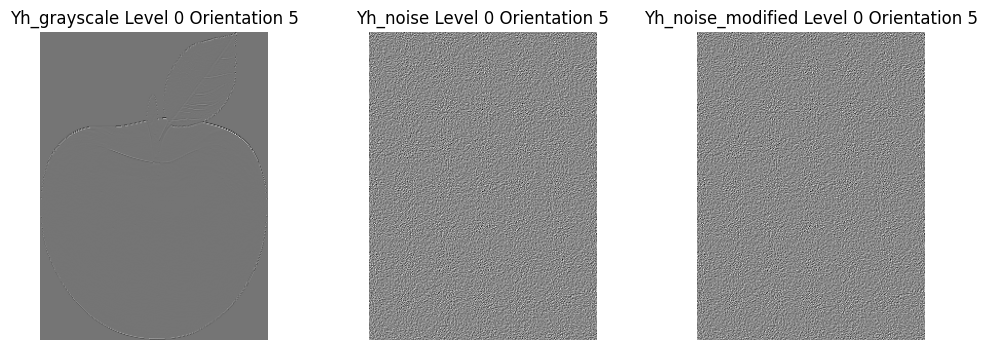

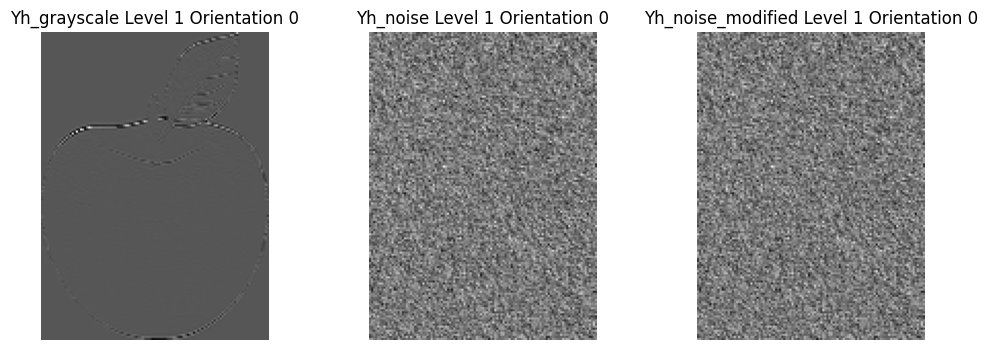

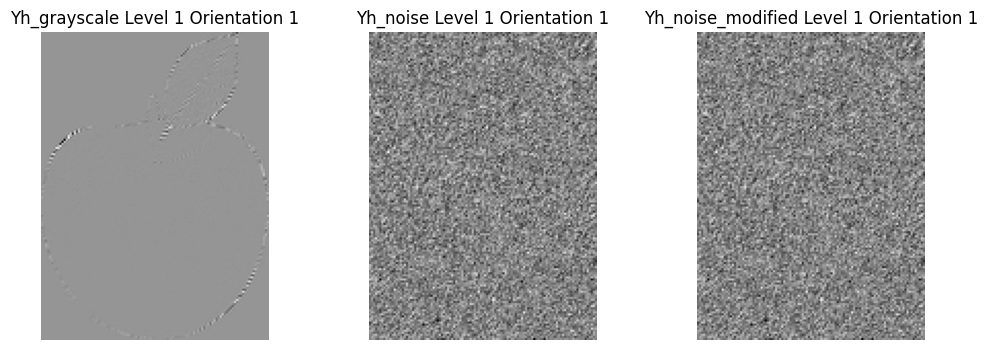

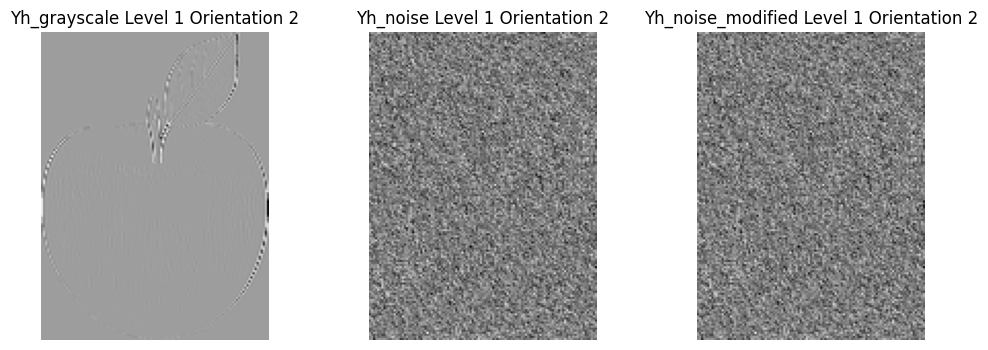

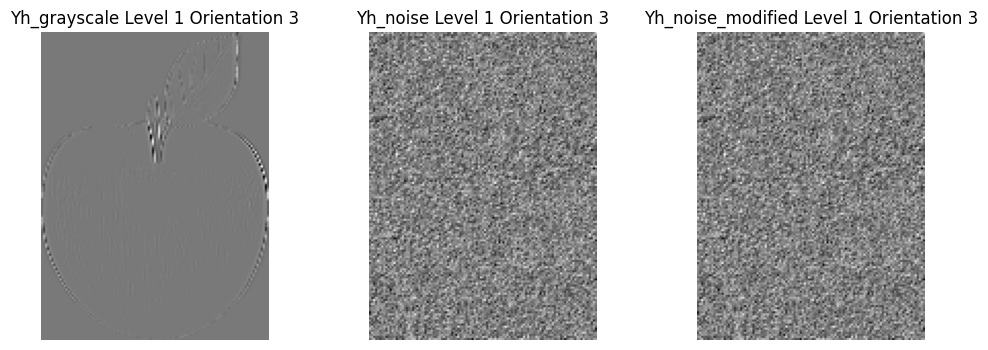

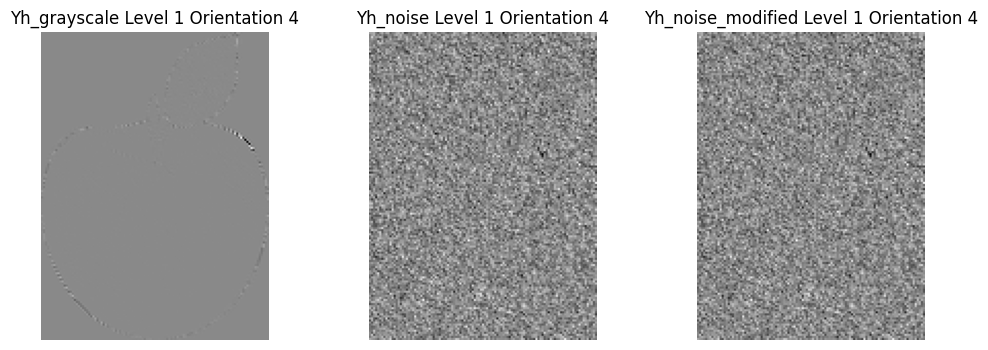

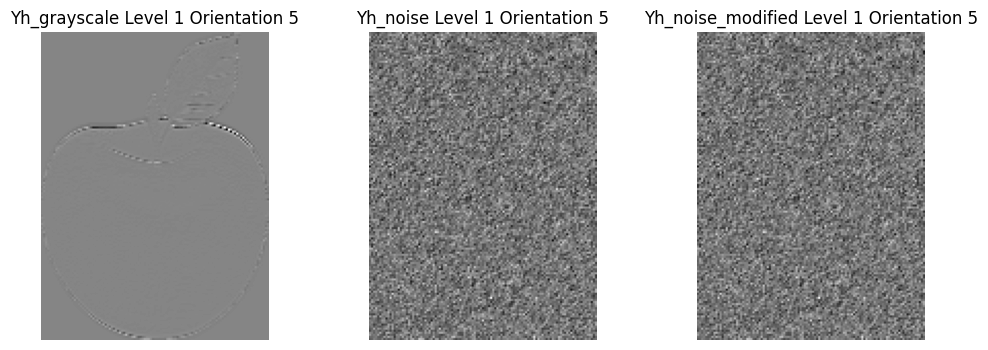

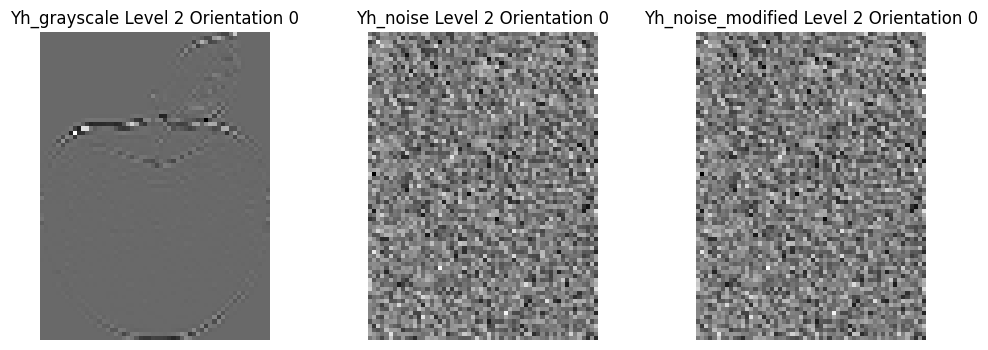

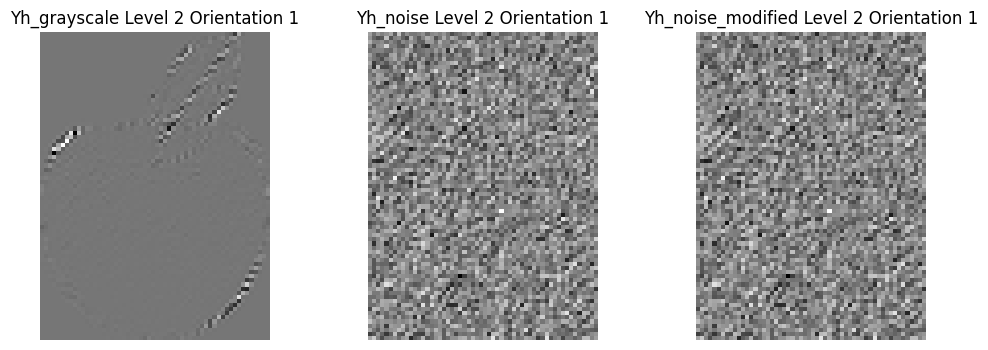

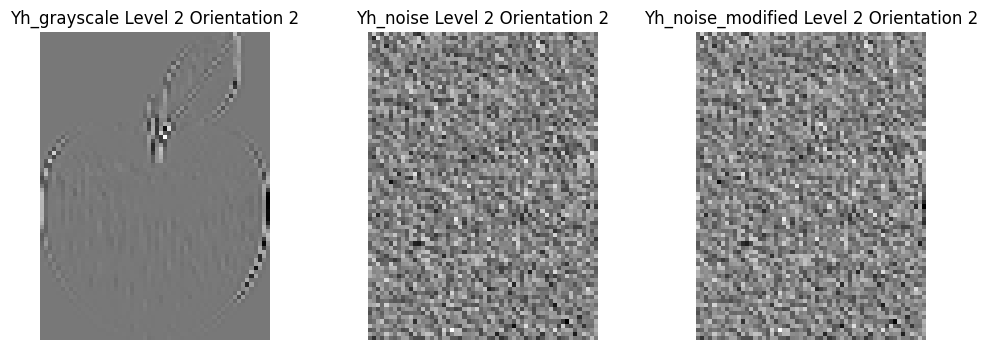

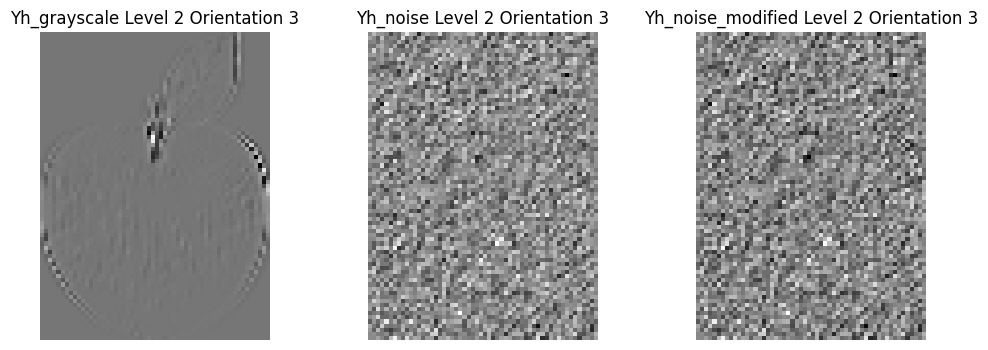

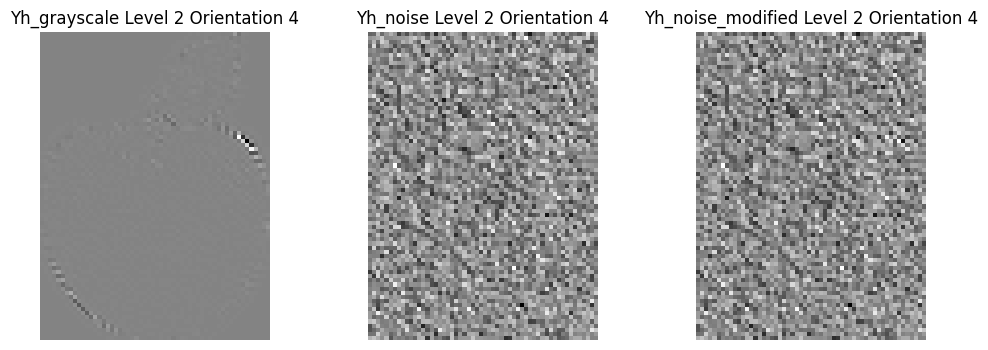

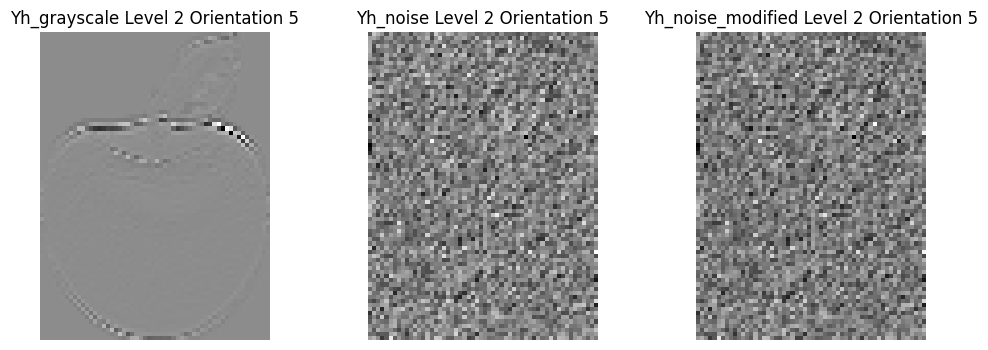

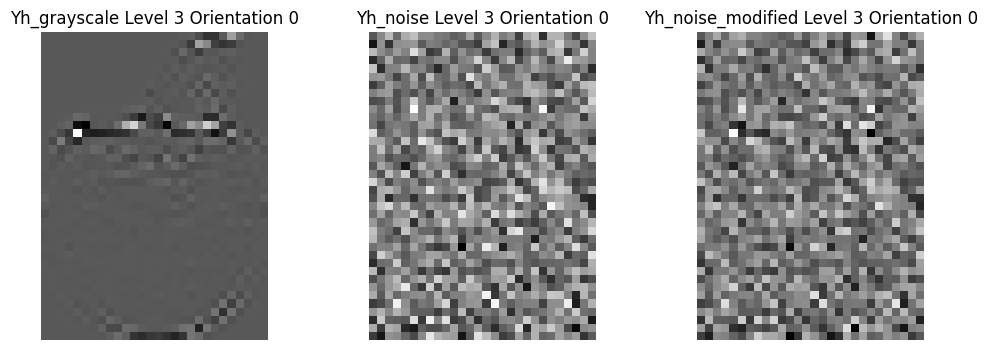

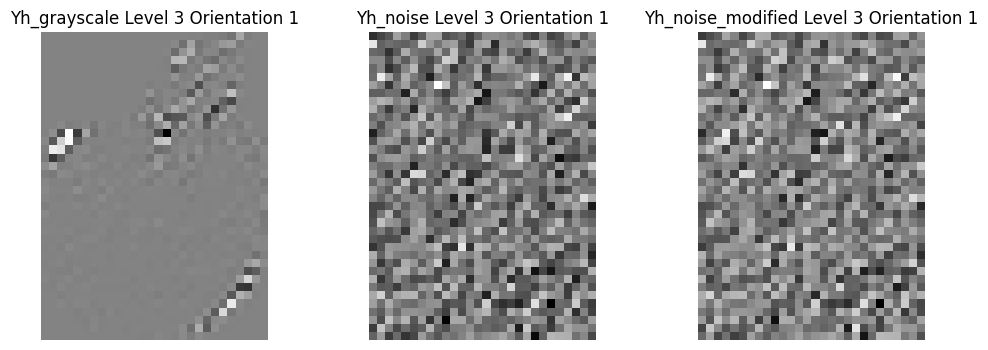

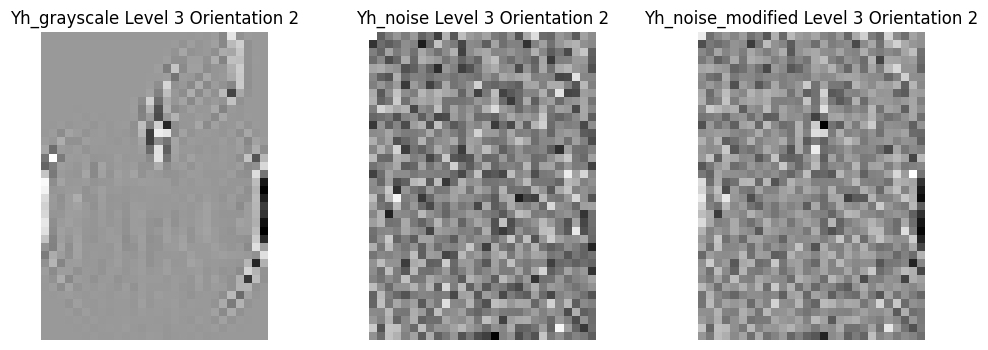

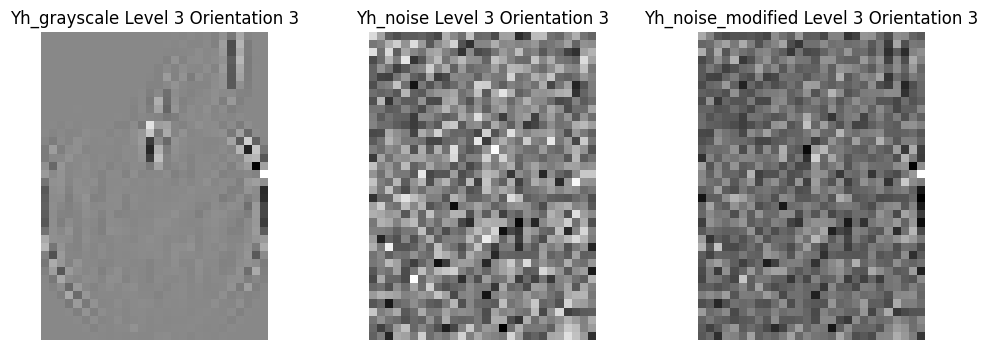

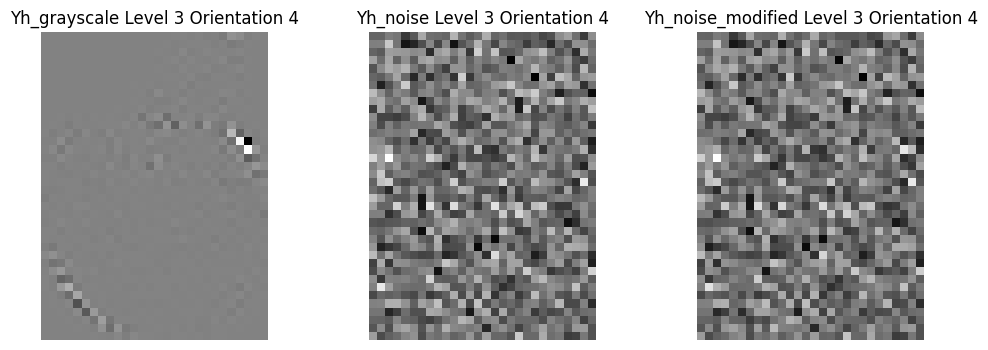

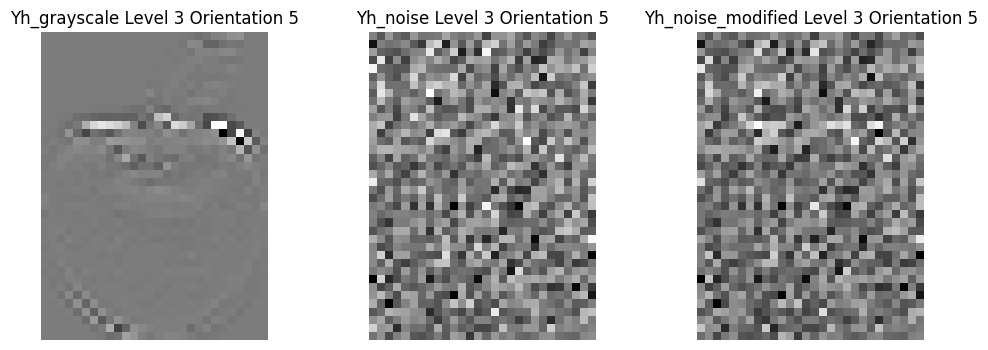

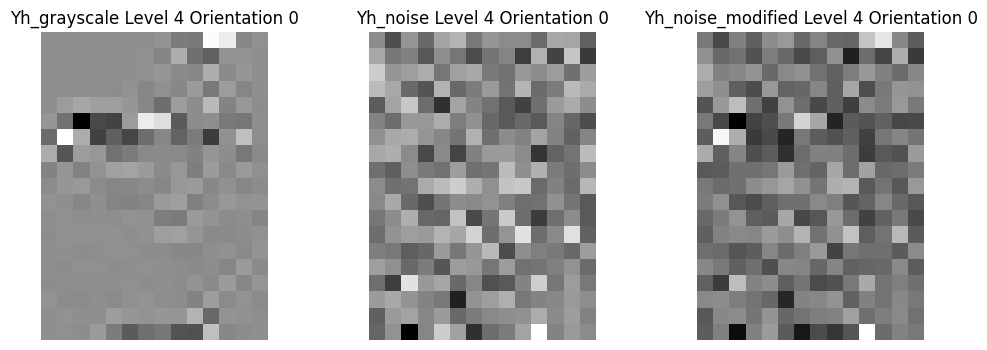

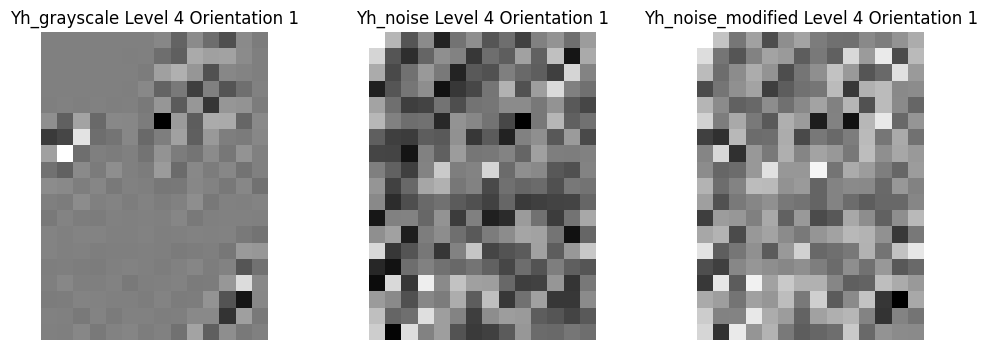

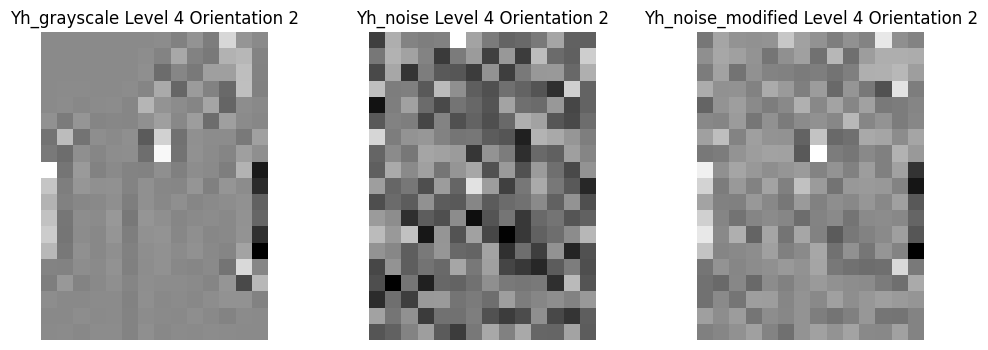

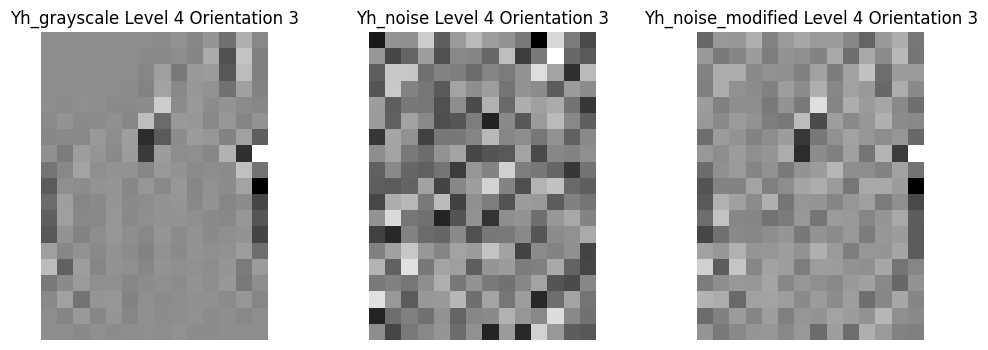

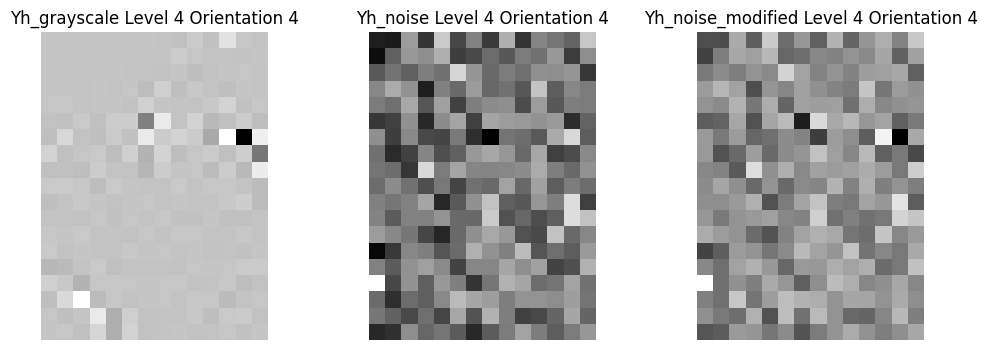

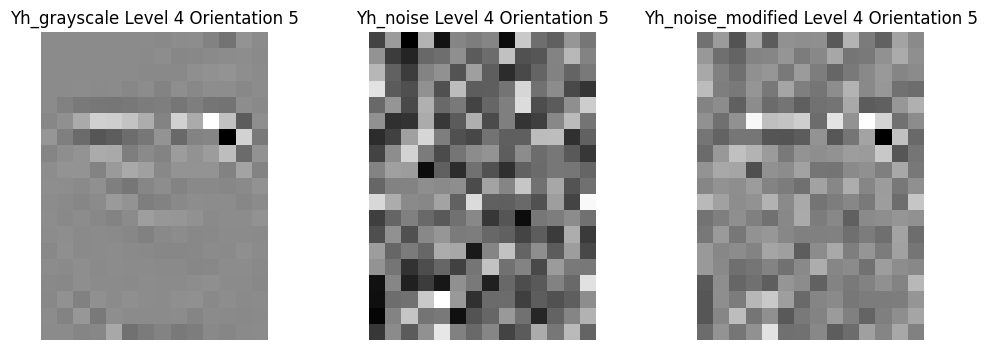

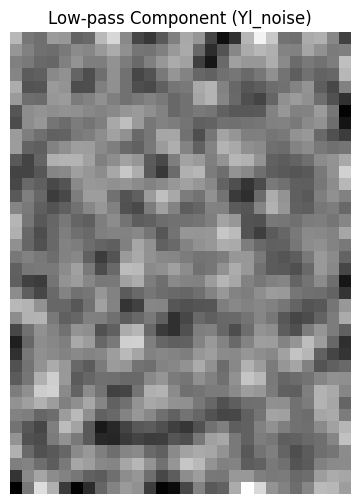

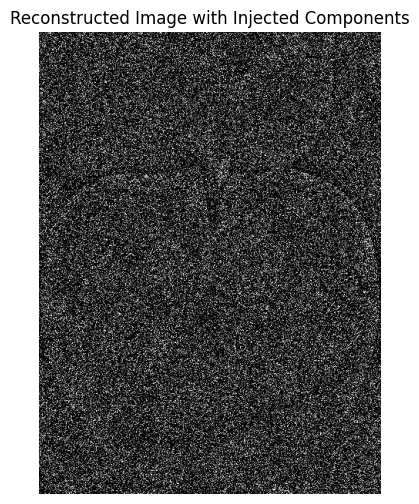

In [31]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from pytorch_wavelets import DTCWTForward, DTCWTInverse
from torchvision.transforms import ToTensor, Grayscale

# Load the grayscale image
grayscale_image = Image.open(image_path)
if grayscale_image.mode != 'L':
    grayscale_image = Grayscale()(grayscale_image)
grayscale_image_tensor = ToTensor()(grayscale_image).unsqueeze(0)  # Shape: [1, 1, H, W]

# Generate Gaussian noise image with the same size
original_width, original_height = grayscale_image.size
noise_image = np.random.normal(0, 1, (original_height, original_width)).astype(np.float32)
noise_image_tensor = torch.from_numpy(noise_image).unsqueeze(0).unsqueeze(0)  # Shape: [1, 1, H, W]

# Initialize the DTCWT with level j = 5
wavelet_transform = DTCWTForward(J=5, biort='near_sym_a', qshift='qshift_a')
inverse_wavelet_transform = DTCWTInverse(biort='near_sym_a', qshift='qshift_a')

# Perform wavelet transform on both images
Yl_grayscale, Yh_grayscale = wavelet_transform(grayscale_image_tensor)
Yl_noise, Yh_noise = wavelet_transform(noise_image_tensor)

# Inject grayscale components into the noise image
alpha = 1  # Blending factor for injection
Yh_noise_modified = []

for level_idx, (Yh_g, Yh_n) in enumerate(zip(Yh_grayscale, Yh_noise)):
    # Ensure both Yh_g and Yh_n have the same shape
    assert Yh_g.shape == Yh_n.shape, f"Shape mismatch at level {level_idx}: {Yh_g.shape} vs {Yh_n.shape}"

    # Perform the injection by blending the components
    Yh_modified = (1 - alpha) * Yh_n + alpha * Yh_g

    # Append the modified subband to the list
    Yh_noise_modified.append(Yh_modified)

    # Convert high-pass components and modified components to numpy arrays for visualization
    Yh_g_np = Yh_g.squeeze().cpu().detach().numpy()
    Yh_n_np = Yh_n.squeeze().cpu().detach().numpy()
    Yh_modified_np = Yh_modified.squeeze().cpu().detach().numpy()

    # Visualize the high-pass components for each level
    for orientation_idx in range(Yh_g_np.shape[0]):
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        plt.title(f"Yh_grayscale Level {level_idx} Orientation {orientation_idx}")
        plt.imshow(Yh_g_np[orientation_idx, :, :, 0], cmap='gray')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.title(f"Yh_noise Level {level_idx} Orientation {orientation_idx}")
        plt.imshow(Yh_n_np[orientation_idx, :, :, 0], cmap='gray')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.title(f"Yh_noise_modified Level {level_idx} Orientation {orientation_idx}")
        plt.imshow(Yh_modified_np[orientation_idx, :, :, 0], cmap='gray')
        plt.axis('off')

        plt.show()

# Print and visualize the low-pass component
Yl_noise_np = Yl_noise.squeeze().cpu().detach().numpy()
if Yl_noise_np.ndim == 3:
    # Handle 3D case: [1, 1, H, W]
    plt.figure(figsize=(6, 6))
    plt.title("Low-pass Component (Yl_noise)")
    plt.imshow(Yl_noise_np[0, :, :], cmap='gray')
    plt.axis('off')
    plt.show()
else:
    # Handle 2D case
    plt.figure(figsize=(6, 6))
    plt.title("Low-pass Component (Yl_noise)")
    plt.imshow(Yl_noise_np, cmap='gray')
    plt.axis('off')
    plt.show()

# Reconstruct the image from the modified components
reconstructed_image_tensor = inverse_wavelet_transform((Yl_noise, Yh_noise_modified))

# Convert the tensor back to an image
reconstructed_image_np = reconstructed_image_tensor.squeeze().cpu().detach().numpy()
reconstructed_image_np = np.clip(reconstructed_image_np, 0, 1)  # Clip values to [0, 1]
reconstructed_image_pil = Image.fromarray((reconstructed_image_np * 255).astype(np.uint8))

# Visualize the final reconstructed image
plt.figure(figsize=(6, 6))
plt.title("Reconstructed Image with Injected Components")
plt.imshow(reconstructed_image_pil, cmap='gray')
plt.axis('off')
plt.show()


In [ ]:
from PIL import Image

# Open an image file
image = Image.open('output_images\\extraction\\AppleGrayscaleWatermarkedWithImageBlurring\\0\\extracted_watermark.png')

# Check if the image is grayscale, RGB, or RGBA
mode = image.mode
print(f"Image mode: {mode}")

# Check image size (width, height)
size = image.size
print(f"Image size: {size}")

# Check image format
format = image.format
print(f"Image format: {format}")

# Check the color bands (channels)
bands = image.getbands()
print(f"Color bands: {bands}")